![Missing values](https://i.imgur.com/ZgPPVC0.jpg)

Before that What are missing values

Its has very obvious and straight forward answer, The data that is missing or not present

Then Question is why data is missing?

because of many reason like data not available, they dont want to share, machine or human error etc.



3 Method to Handle it
1. [Deletion](#deletion)
    1. Column drop
    1. Row drop
1. [Imputation](#imputation)
    1. Mean, Median/Mode replace
    1. Random Sample
    1. Arbitary imputation
    1. Frequent categories imputation
    1. Capture NaN as new feature
1. [Interpolation](#interpolation)
1. [Model-Based Imputation](#model)

### I will frequently update this NoteBook, so follow for cool stuff !!

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")
import missingno as miss  # Missingno library offers a very nice way to visualize the distribution of NaN values.

reading data

In [2]:
titanic = pd.read_csv('../input/titanic/train.csv')
house = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

function to calculate how many missing values

In [3]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
                
        # Coumn for dtypes
        dtype = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,dtype], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values', 2:'Data Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

<a id="deletion"></a>
# Deletion

1. Column drop
1. Row Drop

<a id='col_drop'></a>
## Column drop

<AxesSubplot:>

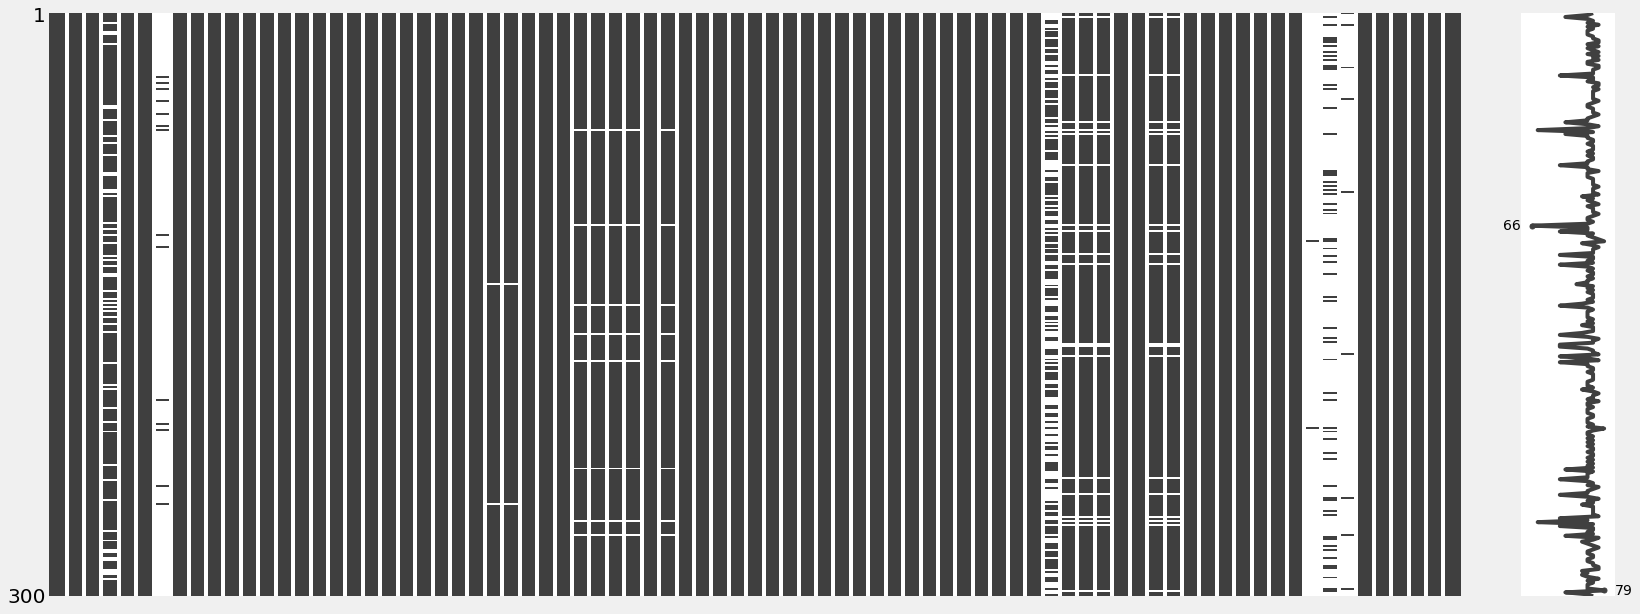

In [4]:
miss.matrix(house.sample(300))

In [5]:
house_miss = missing_values_table(house)
house_miss

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values,Data Types
PoolQC,1453,99.5,object
MiscFeature,1406,96.3,object
Alley,1369,93.8,object
Fence,1179,80.8,object
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object


We see here in column `PoolQC` 99.5 % values are missing, Not enough data to take insight from him

`MiscFeature`, `Alley` this column also lot of missing values

So, we can decide 80 `threshold` to delete columns

if column have more than 80% data missing we simply drop those columns

In [6]:
threshold = 80
drop_cols = house_miss[house_miss['% of Total Values'] > threshold].index.tolist()
drop_cols

['PoolQC', 'MiscFeature', 'Alley', 'Fence']

In [7]:
house = house.drop(columns=drop_cols)
house.shape

(1460, 77)

* Advantage
1. Less number of features
1. model training faster

* Disadvantage
1. We might loose some information

## Row delete

In [8]:
house_miss = missing_values_table(house)
house_miss

Your selected dataframe has 77 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values,Data Types
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object
GarageCond,81,5.5,object
BsmtExposure,38,2.6,object
BsmtFinType2,38,2.6,object
BsmtQual,37,2.5,object


`MasVnrType`, `MasVnrArea`, `Electrical` In this columns less than `3%` data points are missing so we can directly delete those rows.

In [9]:
threshold = 3
drop_rows = house_miss[house_miss['% of Total Values'] < threshold].index.tolist()
drop_rows

['BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']

In [10]:
# This will delete all null rows of `drop_rows` column means this columns  
# ['BsmtExposure',
#  'BsmtFinType2',
#  'BsmtQual',
#  'BsmtCond',
#  'BsmtFinType1',
#  'MasVnrType',
#  'MasVnrArea',
#  'Electrical']
house[drop_rows].dropna(inplace=True)

In [11]:
# Here I will try to show you how to drop null rows from dataset
# we can directly delete null values where null values % is too low
# or we can fill those null values by other methods

<a id='imputation'></a>
# Imputation

1. Mean, Median/Mode replace
1. Random Sample
1. Arbitary imputation
1. Frequent categories imputation
1. Capture NaN as new feature
1. End of distribution
1. Interpolation

## Mean, Median


Replace NaN values by mean or median of column

In [12]:
titanic_miss = missing_values_table(titanic)
titanic_miss

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object


* Age has 19.9% values are missing, we can fill them by mean or median

In [13]:
age_mean = titanic.Age.mean()
age_median = titanic.Age.median()
titanic['age_mean'] = titanic.Age.fillna(age_mean)
titanic['age_median'] = titanic.Age.fillna(age_median)

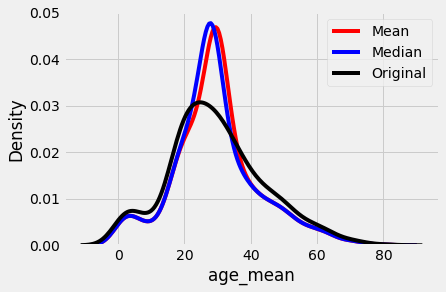

In [14]:
sns.kdeplot(titanic['age_mean'],color='red',label='Mean')
sns.kdeplot(titanic['age_median'],color='blue',label='Median')
sns.kdeplot(titanic['Age'],color='black',label='Original')
plt.legend()

* Red is mean fill na distribution
* Blue is median fill na distribution
* Black is original values

We can observe the distribution of data change after we do fillna using median or mean

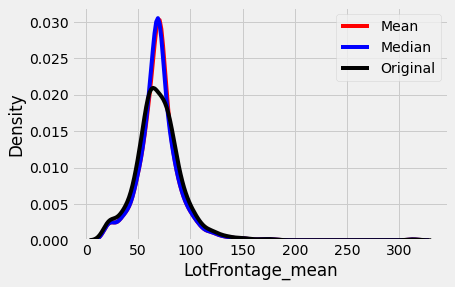

In [15]:
LotFrontage_mean = house.LotFrontage.mean()
LotFrontage_median = house.LotFrontage.median()
house['LotFrontage_mean'] = house.LotFrontage.fillna(LotFrontage_mean)
house['LotFrontage_median'] = house.LotFrontage.fillna(LotFrontage_median)

sns.kdeplot(house['LotFrontage_mean'],color='red',label='Mean')
sns.kdeplot(house['LotFrontage_median'],color='blue',label='Median')
sns.kdeplot(house['LotFrontage'],color='black',label='Original')
plt.legend()

* Advantage
1. Robust to outliers
1. Faster way

* Disadvantage
1. Impact on correlation
1. May change or Distortion in distribution of data points


## Random Sample

Replace NaN values by taking random values from column

In [16]:
def random_rep(df,field):
     df[field+"_random"]=df[field]
     # random value to fill the na
     random_value=df[field].dropna().sample(df[field].isnull().sum(),random_state=0)
     #pandas need to have same index in order to merge the dataset
     random_value.index=df[df[field].isnull()].index
     df.loc[df[field].isnull(),field+'_random']=random_sample

In [17]:
titanic['Age'].dropna().sample(titanic['Age'].isnull().sum())

746    16.0
271    25.0
189    36.0
646    19.0
631    51.0
       ... 
661    40.0
90     29.0
142    24.0
67     19.0
314    43.0
Name: Age, Length: 177, dtype: float64

In [18]:
titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [19]:
random_sample = titanic['Age'].dropna().sample(titanic['Age'].isnull().sum(),random_state=0)
random_sample.index=titanic[titanic['Age'].isnull()].index

In [20]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [21]:
titanic.loc[titanic['Age'].isnull(),'Age'+'_random']=random_sample

In [22]:
titanic['Age_random']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
886     NaN
887     NaN
888    15.0
889     NaN
890     NaN
Name: Age_random, Length: 891, dtype: float64

## Arbitary imputation

It is defined as replacing all occurrences of missing values within a variable by an arbitrary value. Ideally the value should be different from the median/mean/mode, and not within the normal range of the variable.

In [23]:
missing_values_table(titanic)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Age_random,714,80.1,float64
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object


In [24]:
titanic['Age_arbitary'] = titanic['Age'].fillna(-999)

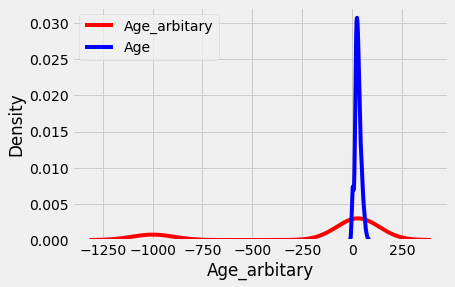

In [25]:
sns.kdeplot(titanic['Age_arbitary'],color='red',label='Age_arbitary')
sns.kdeplot(titanic['Age'],color='blue',label='Age')
plt.legend()

Advantages
1.  It’s a fast way to obtain complete datasets.
1.  It captures the importance of a value being “missing”, if there is one.

Disadvantage

1. Distortion of the original variable distribution and variance.
1. Distortion of the covariance with the remaining dataset variables.
1. If the arbitrary value is at the end of the distribution, it may mask or create outliers.
1. We need to be careful not to choose an arbitrary value too similar to the mean or median (or any other typical value of the variable distribution).
1. The higher the percentage of NA, the higher the distortions.

## Frequent categories imputation

It is use for Categorical Features

In [26]:
c_house = missing_values_table(house)
c_house

Your selected dataframe has 79 columns.
There are 15 columns that have missing values.


,Missing Values,% of Total Values,Data Types
FireplaceQu,690,47.3,object
LotFrontage,259,17.7,float64
GarageType,81,5.5,object
GarageYrBlt,81,5.5,float64
GarageFinish,81,5.5,object
GarageQual,81,5.5,object
GarageCond,81,5.5,object
BsmtExposure,38,2.6,object
BsmtFinType2,38,2.6,object
BsmtQual,37,2.5,object


<AxesSubplot:>

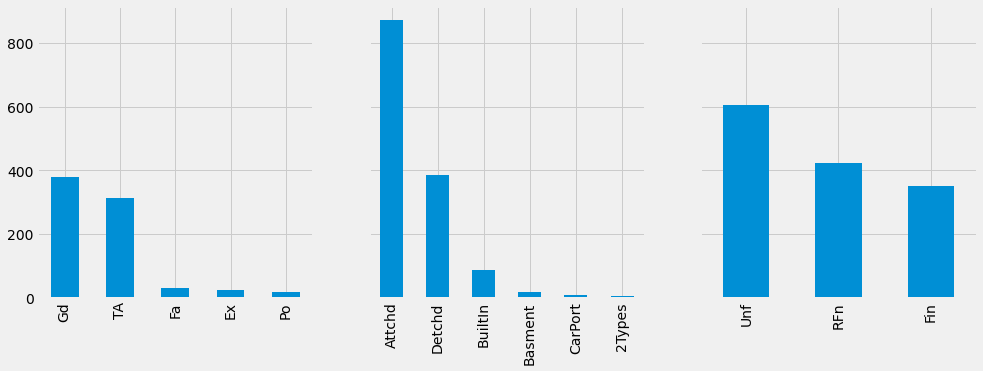

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
house.FireplaceQu.value_counts().plot.bar(ax=axes[0])
house.GarageType.value_counts().plot.bar(ax=axes[1])
house.GarageFinish.value_counts().plot.bar(ax=axes[2])

In [28]:
house.FireplaceQu.mode()[0]

'Gd'

In [29]:
house.GarageType.mode()[0]

'Attchd'

The mode of a set of data values is the value that appears most often.

In [30]:
def freq_imp(df,variable):
    frq_cat = df[variable].mode()[0]
    df[variable].fillna(frq_cat, inplace=True)

In [31]:
c_house[c_house['Data Types'] == 'object'].index.tolist()

['FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'Electrical']

In [32]:
cat_columns = c_house[c_house['Data Types'] == 'object'].index.tolist()

Create seperate list for missing categorical columns

In [33]:
for col in cat_columns:
    freq_imp(house,col)

Apply function

In [34]:
missing_values_table(house)

Your selected dataframe has 79 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,259,17.7,float64
GarageYrBlt,81,5.5,float64
MasVnrArea,8,0.5,float64


Now no NaN values for any categorical feature

Advantages
1. Fater way to implement 

Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
1. It distorts the relation of the most frequent label

## Capture NaN as New Feature

create new column as is values missing or not and then fill missing values

In [35]:
hdf = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv',usecols=['GarageType','SalePrice'])
hdf.head(5)

,GarageType,SalePrice
0,Attchd,208500
1,Attchd,181500
2,Attchd,223500
3,Detchd,140000
4,Attchd,250000


In [36]:
missing_values_table(hdf)

Your selected dataframe has 2 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values,Data Types
GarageType,81,5.5,object


In [37]:
hdf['garage_null'] = np.where(hdf['GarageType'].isnull(),1,0)

Create a new column as columnName_null fill with is value missing 1 else 0

In [38]:
hdf['GarageType'] = hdf['GarageType'].fillna(hdf['GarageType'].mode()[0])

Fill null values with most frequent value, you can also try with other methods like pput missing values new category

In [39]:
missing_values_table(hdf)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data Types


In [40]:
def nan_new_col(df,variable):
    hdf[variable+'_null'] = np.where(hdf[variable].isnull(),1,0)
    hdf[variable] = hdf[variable].fillna(hdf[variable].mode()[0])

Advantage
1. Might increase score of model
1. we gather information from missing values

Disadvantage
1. Create more features

## Capture NaN as new category

we just replace NAN with a new category 

In [41]:
t_miss = missing_values_table(titanic)
t_miss

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Age_random,714,80.1,float64
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object


In [42]:
t_miss[t_miss['Data Types'] == 'object'].index.tolist()

['Cabin', 'Embarked']

In [43]:
cat_col = t_miss[t_miss['Data Types'] == 'object'].index.tolist()

Take missing catgorical values

In [44]:
def nan_cat(df,var):
    df[var].fillna('Other',inplace=True)

create function

In [45]:
for col in cat_col:
    nan_cat(titanic, col)

In [46]:
titanic.Cabin.value_counts()

Other          687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
F E69            1
C70              1
E10              1
B101             1
E46              1
Name: Cabin, Length: 148, dtype: int64

Advantage
1. Fast way

Disadvantage
1. May change distribution
1. Cannot use everytime

<a id='interpolation'></a>
# Interpolation

We uses various interpolation technique to fill the missing values rather than hard-coding the value.

DataFrame.interpolate(method='linear', axis=0, limit=None, inplace=False, limit_direction=None, limit_area=None, downcast=None, **kwargs)
Fill NaN values using an interpolation method.

In [47]:
missing_values_table(house)

Your selected dataframe has 79 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Data Types
LotFrontage,259,17.7,float64
GarageYrBlt,81,5.5,float64
MasVnrArea,8,0.5,float64


<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

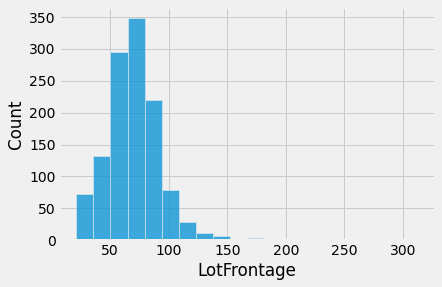

In [48]:
sns.histplot(house.LotFrontage, bins=20)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

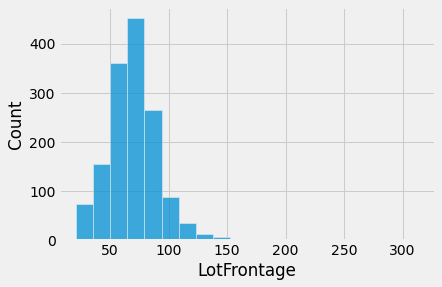

In [49]:
interpolate = house.LotFrontage.interpolate(method='linear')
sns.histplot(interpolate, bins=20)

we see there is no change in distribution

Let's try another method

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

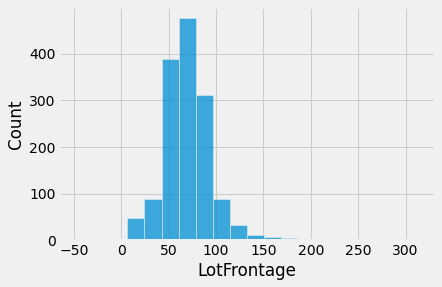

In [50]:
sns.histplot(house.LotFrontage.interpolate(method='polynomial', order=2),bins=20)

Various methods:
‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘spline’, ‘barycentric’, ‘polynomial’

CheckOut
[Documentaion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html)

Advantage
1. Fast implementation
2. No change in distribution
3. Various method available

Disadvantage
1. Not useful when lots of null values he just linearly place value
2. Hard to select method

<a id='model'></a>
# Model-Based Imputation

Why not use ML models to predict NaN values (sound intreasting!) and it is!!!!

In [51]:
titanic = pd.read_csv('../input/titanic/train.csv')
missing_values_table(titanic)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Cabin,687,77.1,object
Age,177,19.9,float64
Embarked,2,0.2,object


* We can use this technique for both continous and categorical 
* We can use advnace models like XGBoost, Random Forest 


Age

In [52]:
# Prepare data for Model
temp_titanic = titanic.copy()
temp_titanic.dropna(inplace=True)  #drop all null values from New dataset
age_X = temp_titanic[['Pclass','SibSp','Parch', 'Fare']]  # take numerical columns
age_y = temp_titanic.Age # Our null value column is Target

In [53]:
from sklearn.neighbors import KNeighborsRegressor
na_knn = KNeighborsRegressor()
na_knn.fit(age_X,age_y)
na_knn.score(age_X,age_y)

0.29668220909615994

Good score, it doesn't need to be 0

Here, we do regression so score is in R2, lower the R2 better model

In [54]:
na_age_index = titanic[titanic['Age'].isna()]  
# Take all values their Age has null value
# Here we go slowly slowly each line by line

In [55]:
na_age_index = titanic[titanic['Age'].isna()][['Pclass','SibSp','Parch', 'Fare']]
# we select dataframe where age has null value
# then we select only those column that we take when we train model
titanic[titanic['Age'].isna()][['Pclass','SibSp','Parch', 'Fare']]

,Pclass,SibSp,Parch,Fare
5,3,0,0,8.4583
17,2,0,0,13.0000
19,3,0,0,7.2250
26,3,0,0,7.2250
28,3,0,0,7.8792
...,...,...,...,...
859,3,0,0,7.2292
863,3,8,2,69.5500
868,3,0,0,9.5000
878,3,0,0,7.8958


In [56]:
age_na_pred = na_knn.predict(na_age_index)
# we take that dataframe of null age with selected column and predict age

In [57]:
age_fill_na = titanic[titanic['Age'].isna()].index
# Take index where age is NaN

In [58]:
titanic.loc[age_fill_na,'Age'] = age_na_pred
# We fill null values by predicted model values

In [59]:
missing_values_table(titanic)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Data Types
Cabin,687,77.1,object
Embarked,2,0.2,object


Very long process

Advantage
1. It quite good
1. We can also check how good our model is

Disadvantage
1. Hard to implement
1. Each column reqire different Model

### Pro tip: 
* Do not use your original target feature in Null value model, Beacuse that column is absent in test dataset
* We can use decision trees when categorical features in model (trees handle categorical features)

My other useful Notebooks:

### [Multiprocessing Made Easy !!!]('https://www.kaggle.com/rushikeshdarge/multiprocessing-made-easy')

### [Popular Graphs for Beginners]('https://www.kaggle.com/rushikeshdarge/popular-graphs-for-beginners')

### [Detail Data Exploration [EDA] of New York City Taxi]('https://www.kaggle.com/rushikeshdarge/data-exploration-eda-of-new-york-city-taxi')